In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import torch

import numpy as np
import matplotlib.pylab as plt

from os.path import join
from pathlib import Path

from models.CustomVQVAE import VQVAE_PL

import pytorch_lightning as pl

from torchvision.utils import make_grid
from customLoader import CustomMinecraftData
from torchvision.transforms import transforms


In [3]:
conf = {
  'num_hiddens': 64,
  'num_residual_hiddens': 32,
  'num_residual_layers': 2,
  'embedding_dim': 256,
  'num_embeddings': 10,
  'commitment_cost': 0.25,
  'decay': 0.99,
  'reward_type': 'sparse'
}

In [4]:
vqvae = VQVAE_PL("pixel", **conf).cuda()
vqvae.eval()

VQVAE_PL(
  (model): PixelVQVAE(
    (_encoder): Encoder(
      (_conv_1): Conv2d(3, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (_conv_2): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (_conv_3): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (_conv_4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (_conv_5): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (_residual_stack): ResidualStack(
        (_layers): ModuleList(
          (0): Residual(
            (_block): Sequential(
              (0): ReLU(inplace=True)
              (1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (2): ReLU(inplace=True)
              (3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            )
          )
          (1): Residual(
            (_block): Sequential(
              (0): ReLU(inplace=True)
              (1): Co

In [5]:
vqvae.model._vq_vae._embedding.weight

Parameter containing:
tensor([[ 1.0335, -2.7787, -0.4495,  ..., -0.3440, -1.8808, -0.3063],
        [ 0.2845,  0.4367, -1.0217,  ..., -0.8467,  1.3196, -2.4399],
        [ 0.1013, -0.3890,  0.8639,  ..., -0.4219,  0.4247, -1.6948],
        ...,
        [-1.8975, -0.7343, -2.1355,  ...,  0.3653, -0.5263,  1.6513],
        [-0.2686,  0.8223,  0.9290,  ...,  0.5148, -0.5526, -0.6085],
        [-0.1691,  0.5489,  0.9597,  ..., -0.1233,  0.2034, -1.8520]],
       device='cuda:0', requires_grad=True)

In [6]:
path = '../results/vqvae_Expert_pixels_0/mineRL/3l23j1s9/checkpoints/epoch=8-step=7831.ckpt'
checkpoint = torch.load(path)


In [7]:
vqvae.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [8]:
vqvae.model._vq_vae._embedding.weight

Parameter containing:
tensor([[2.2632e-03, 1.9156e-06, 7.6004e-06,  ..., 9.2049e-02, 3.2252e-01,
         2.6720e-05],
        [5.5357e-02, 3.3118e-08, 2.1741e-06,  ..., 5.1986e-03, 3.8576e-01,
         6.7741e-06],
        [1.6064e-01, 2.0601e-07, 2.6477e-07,  ..., 5.7954e-01, 1.2638e+00,
         5.1154e-06],
        ...,
        [4.9397e-01, 2.0360e-05, 2.1462e-07,  ..., 1.5232e+00, 3.6955e-02,
         9.2548e-07],
        [4.4571e-01, 7.2325e-07, 2.0812e-07,  ..., 1.5587e+00, 1.4287e+00,
         7.4323e-07],
        [2.7400e-01, 1.3212e-07, 1.0149e-07,  ..., 1.3260e+00, 1.1925e+00,
         4.8588e-07]], device='cuda:0', requires_grad=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


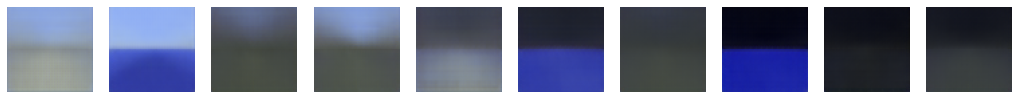

In [9]:
list_imgs, _ = vqvae.model.list_reconstructions()
fig, axes = plt.subplots(ncols=len(list_imgs), figsize=(18,10))
for i, ax in enumerate(axes):
    
    img = list_imgs[i] + 0.5
    img[img>1] = 1
    ax.imshow(img)
    ax.axis('off')
plt.show()
#plt.savefig(f'/home/juanjo/Pictures/Minecraft/centroides/vqvae_pixelcoord_CW4.png', transparent=True)
    